In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Perceptron
import torch
from torch import nn, optim
import math
import random

In [2]:
data = pd.read_csv('diabetes.csv')
print(data.shape)

data.head()

(253680, 22)


,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8


In [3]:
X = data.drop("Diabetes", axis = 1)
y = data["Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape)

(202944, 21) (50736, 21)


In [4]:
def performance_metrics(model, y_test, X_test):
    auc = metrics.roc_auc_score(y_test, model.decision_function(X_test))
    print("AUC score: ", auc)

    f1 = metrics.f1_score(y_test, model.predict(X_test), average='weighted')
    print("F1 score: ", f1)

    acc = metrics.accuracy_score(y_test, model.predict(X_test)) 
    print("Accuracy: ", acc)

    precision = metrics.precision_score(y_test, model.predict(X_test), average='weighted')
    print("Precision: ", precision)

    recall = metrics.recall_score(y_test, model.predict(X_test), average='weighted')
    print("Recall: ", recall)

## Question 1

Build and train a Perceptron (one input layer, one output layer, no hidden layers and no activation functions) to classify diabetes from the rest of the dataset. What is the AUC of this model?

AUC score:  0.7854106215294139
F1 score:  0.7174490852828371
Accuracy:  0.6657205928729107
Precision:  0.8547226617903019
Recall:  0.6657205928729107


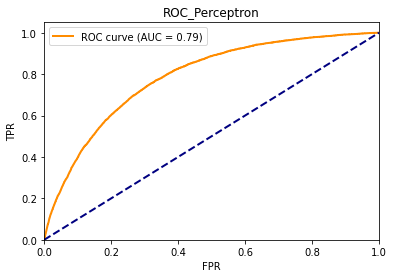

In [5]:
perceptron = Perceptron(class_weight = 'balanced', early_stopping = True)
perceptron.fit(X_train,y_train)

performance_metrics(perceptron, y_test, X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, perceptron.decision_function(X_test))

# Calculate AUC-ROC
auc_roc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_Perceptron')
plt.legend(loc="best")
plt.show()

In [6]:
result = permutation_importance(perceptron, X_test, y_test, n_repeats=30, random_state=42)
importances = result.importances_mean
indices = importances.argsort()[::1]

print("Feature Importances:")
for i in indices:
    print(f"{X_train.columns[i]}: {importances[i]}")

Feature Importances:
PhysicalHealth: -0.003698885735309591
AgeBracket: -0.0031135025754231143
MentalHealth: -0.001925654367707356
BiologicalSex: -0.0010505361084831393
IncomeBracket: -0.0006563386944181867
Zodiac: -0.0001760748449490294
Vegetables: -0.00015439398717544592
NotAbleToAffordDoctor: -9.854935351623814e-06
Smoker: 3.876274571638083e-05
HasHealthcare: 9.986334489645588e-05
PhysActivity: 0.00014519604751392172
Fruit: 0.00014979501734468936
Stroke: 0.00048223483653945615
EducationBracket: 0.0008731472721538846
HardToClimbStairs: 0.0008843161988857151
HeavyDrinker: 0.0012187270051508326
Myocardial: 0.002018947755702716
HighChol: 0.002598417954378207
HighBP: 0.006649453379585827
BMI: 0.013038736465888774
GeneralHealth: 0.026136602543887295


## Question 2

Build and train a feedforward neural network with at least one hidden layer to classify diabetes from the rest of the dataset. Make sure to try different numbers of hidden layers and different activation functions (at a minimum reLU and sigmoid). Doing so: How does AUC vary as a function of the number of hidden layers and is it dependent on the kind of activation function used (make sure to include “no activation function” in your comparison). How does this network perform relative to the Perceptron?

In [7]:
class hidden1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(D, H)
        self.fc2 = nn.Linear(H, C)
    
    def forward(self, x):
        x = activation(self.fc1(x))
        x = self.fc2(x)
        return x

In [8]:
class hidden2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(D, H)
        self.fc2 = nn.Linear(H, H)
        self.fc3 = nn.Linear(H, C)
    
    def forward(self, x):
        x = activation(self.fc1(x))
        x = activation(self.fc2(x))
        x = self.fc3(x)
        return x

In [9]:
class hidden3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(D, H)
        self.fc2 = nn.Linear(H, H)
        self.fc3 = nn.Linear(H, H)
        self.fc4 = nn.Linear(H, C)
    
    def forward(self, x):
        x = activation(self.fc1(x))
        x = activation(self.fc2(x))
        x = activation(self.fc3(x))
        x = self.fc4(x)
        return x

In [10]:
class hidden4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(D, H)
        self.fc2 = nn.Linear(H, H)
        self.fc3 = nn.Linear(H, H)
        self.fc4 = nn.Linear(H, H)
        self.fc5 = nn.Linear(H, C)
    
    def forward(self, x):
        x = activation(self.fc1(x))
        x = activation(self.fc2(x))
        x = activation(self.fc3(x))
        x = activation(self.fc4(x))
        x = self.fc5(x)
        return x

In [11]:
# First lets setup the hyperparameters for our network architecture
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
D = X_train.columns.size  # dimensions
C = 2  # num_classes
H = 500  # num_hidden_units

# Get our device in a variable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [12]:
def train_model(model, X_train, y_train, optimizer, epoch):
    criterion = nn.CrossEntropyLoss()
    for epoch in range(epoch):
        # Forward pass over the model to get the logits 
        y_pred = model(X_train)

        # Compute loss
        loss = criterion(y_pred, y_train.long())
        
        # Print progress
        clear_output(wait=True)
        print(f'Epoch: {epoch}, Loss: {loss}')

        # reset (zero) the gradients before running the backward pass over the model
        # we need to do this because the gradients get accumulated at the same place across iterations
        optimizer.zero_grad()

        # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
        loss.backward()

        # Update params
        optimizer.step()
        
def evaluate_auc(model, X_test, y_test):
    with torch.no_grad():
        y_score = nn.functional.softmax(model(X_test), dim=1)[:, 1].numpy()
        auc = metrics.roc_auc_score(y_true=y_test, y_score=y_score)
        # print(f'AUC: {auc}')
        return auc

In [ ]:
X_train_tensor = torch.from_numpy(X_train.values).float().to(device)
y_train_tensor = torch.from_numpy(y_train.values).float().to(device)
X_test_tensor = torch.from_numpy(X_test.values).float().to(device)
y_test_tensor = torch.from_numpy(y_test.values).float().to(device)
X_train_tensor_cpu = torch.from_numpy(X_train.values).float()
y_train_tensor_cpu = torch.from_numpy(y_train.values).float()
X_test_tensor_cpu = torch.from_numpy(X_test.values).float()
y_test_tensor_cpu = torch.from_numpy(y_test.values).float()

In [ ]:
activations = [nn.Sigmoid(), nn.ReLU(), nn.Tanh(), None]
activation = ['Sigmoid', 'ReLU', 'Tanh', 'None']
models = [hidden1, hidden2, hidden3, hidden4]
model_hidden = ['1 layer', '2 layers', '3 layers', '4 layers]
aucs = pd.DataFrame(data=0, dtype='float64', index=model_hidden, columns=activation)
epoch = 100
learning_rate = 1e-2
lambda_l2 = 1e-2 # coefficient for the L2 regularizer. You should play with its value to see the effect of regularization
passes = 5

In [ ]:
for i in range(passes):
    for m, hidden_layer in zip(models, model_hidden):
        for a, ac in zip(activations, activation):
            activation = a
            model = m().to(device)
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2
            train_model(model, X_train_tensor, y_train_tensor, optimizer, epoch)
            aucs.at[hidden_layer, ac] += evaluate_auc(model.cpu(), X_test_tensor_cpu, y_test_tensor_cpu)
aucs = aucs.div(passes)

In [ ]:
train_score_sum = torch.zeros(size=y_train.shape)
test_score_sum = torch.zeros(size=y_test.shape)
for i in range(passes):
    activation = nn.ELU()
    model = hidden1().to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2
    train_clf(model, X_train_tensor, y_train_tensor, optimizer, epoch)
    model.cpu()
    with torch.no_grad():
        train_score_sum += nn.functional.softmax(model(X_train_tensor_cpu), dim=1)[:, 1]#.numpy()
        test_score_sum += nn.functional.softmax(model(X_test_tensor_cpu), dim=1)[:, 1]#.numpy()
train_score_avg = train_score_sum.div(passes)
test_score_avg = test_score_sum.div(passes)

## Question 4

Build and train a feedforward neural network with one hidden layer to predict BMI from the rest of the dataset. Use RMSE to assess the accuracy of your model. Does the RMSE depend on the activation function used?

In [ ]:
X = data.drop("BMI", axis = 1)
y = data['BMI']

X_trainBMI, X_testBMI, y_trainBMI, y_testBMI = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.from_numpy(X_train.values).float().to(device)
y_train_tensor = torch.from_numpy(y_train.values).float().to(device)
X_test_tensor = torch.from_numpy(X_test.values).float().to(device)
y_test_tensor = torch.from_numpy(y_test.values).float().to(device)
X_train_tensor_cpu = torch.from_numpy(X_train.values).float()
y_train_tensor_cpu = torch.from_numpy(y_train.values).float()
X_test_tensor_cpu = torch.from_numpy(X_test.values).float()
y_test_tensor_cpu = torch.from_numpy(y_test.values).float()

In [ ]:
def train_reg(model, X_train, y_train, optimizer, epoch):
    criterion = nn.MSELoss()
    for epoch in range(epoch):
        # Forward pass over the model to get the logits 
        y_pred = model(X_train)

        # Compute loss
        loss = criterion(y_pred[:, 0], y_train)
        
        # Print progress
        clear_output(wait=True)
        print(f'Epoch: {epoch}, Loss: {loss}')

        # reset (zero) the gradients before running the backward pass over the model
        # we need to do this because the gradients get accumulated at the same place across iterations
        optimizer.zero_grad()

        # Backward pass to compute the gradient of loss w.r.t our learnable params (weights and biases)
        loss.backward()

        # Update params
        optimizer.step()
        
        
def evaluate_rmse(model, X_test, y_test):
    with torch.no_grad():
        y_pred = model(X_test)
        mse = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
        # print(f'AUC: {auc}')
        return math.sqrt(mse)

In [ ]:
activations = [nn.Sigmoid(), nn.ReLU(), nn.Tanh(), None]
activation = ['Sigmoid', 'ReLU', 'Tanh', 'None']
models = [hidden1, hidden2, hidden3, hidden4]
model_hidden = ['1 layer', '2 layers', '3 layers', 'layer4']
rmses = pd.DataFrame(data=0, dtype='float64', index=model_hidden, columns=activation)
epoch = 1000
learning_rate = 1e-4
lambda_l2 = 1e-2 # coefficient for the L2 regularizer. You should play with its value to see the effect of regularization
passes = 5

In [ ]:
for i in range(passes):
    for m, hidden_layer in zip(models, model_hidden):
        for a, ac in zip(activations, activation):
            activation = a
            model = m().to(device)
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2
            train_model(model, X_train_tensor, y_train_tensor, optimizer, epoch)
            rmses.at[hidden_layer, ac] += evaluate_auc(model.cpu(), X_test_tensor_cpu, y_test_tensor_cpu)
rmses = rmses.div(passes)

In [ ]:
y_pred_sum = torch.zeros(size=y_test.shape)
for i in range(passes):
    activation = nn.ELU()
    model = MLPClassifier_3().to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2
    train_reg(model, X_train_tensor, y_train_tensor, optimizer, epoch)
    model.cpu()
    with torch.no_grad():
        y_pred_sum += model(X_test_tensor_cpu)[:, 0]
y_pred_avg = y_pred_sum.div(passes)

In [ ]:
plt.scatter(x=y_pred_avg, y=y_test, s=1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'RMSE: {math.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_avg)):.5f}')